In [1]:
#!/usr/bin/env python3 

In [2]:
# importing the necessary modules 
import tensorflow as tf 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from random import randint 

/opt/anaconda3/envs/ml/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:
# load the saved model 
model = tf.saved_model.load("savedModel") 

In [5]:
# load the image 
image = cv2.imread("image.jpg") 

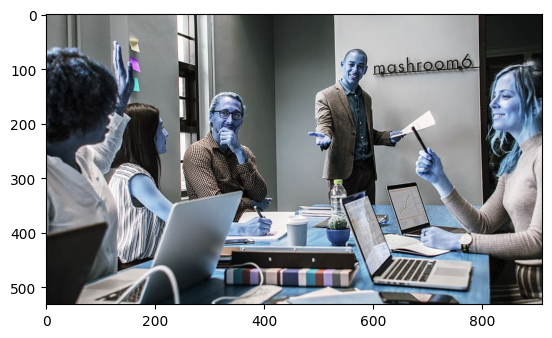

In [10]:
plt.imshow(image, cmap="Grays") 
plt.show() 

In [12]:
# Conver the image into a numpy array 
image = np.array(image) 

# Convert the image into an input tensor 
inputTensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.uint8) 

In [14]:
detection = model(inputTensor) 

In [16]:
# Parse the detection results 
boxes = detection['detection_boxes'].numpy() 
classes = detection['detection_classes'].numpy().astype(int)
scores = detection['detection_scores'].numpy() 

In [17]:
labels = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
          'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 
          'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
          'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
          'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
          'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
          'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 
          'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
          'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
          'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

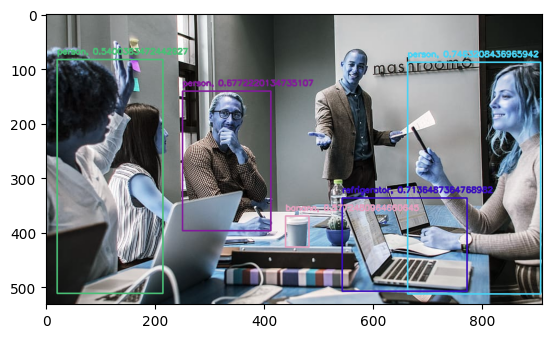

In [18]:
# Detecting the object inside the image 
for i in range(classes.shape[1]): 
    classId = int(classes[0, i]) 
    score = scores[0, i]
    
    # Confidence level 
    if np.any(score > 0.5): 
        h, w, _ = image.shape
        ymin, xmin, ymax, xmax = boxes[0, i] 
        
        # Convert the normalized coordinates to image coordinates 
        xmin = int(xmin * w) 
        xmax = int(xmax * w) 
        ymin = int(ymin * h) 
        ymax = int(ymax * h) 
        
        # Get the class name from the labels list 
        className = labels[classId]
        randomColor = (randint(0, 256), randint(0, 256), randint(0, 256))
        
        # Draw bounding box and label the image 
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), randomColor, 2)
        label = f"{className}, {score}"
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, randomColor, 2) 
        

# Display the result 
plt.imshow(image) 
plt.show() 